# NASA NTL 2: Graphs

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [56]:
MERGED = pd.read_csv('/Users/isabellagermani/Desktop/Projects/NASA Nighttime Lights & MTA Infrastructure/Merged Dataset.csv')

In [57]:
MERGED

,Month,Avg Light Intensity Value,Avg Monthly Metro Card Count,Number of incidents: Other,Number of incidents: Police/Medical/Person on Track,Number of incidents: Signals,Number of incidents: Stations and Structure,Number of incidents: Subway Car,Number of incidents: Track,Total Number of incidents
0,2015-01,56,60427,220,736,882,4,60,560,2462
1,2015-02,69,65266,705,180,864,24,12,616,2401
2,2015-03,62,69635,72,360,396,0,24,1386,2238
3,2015-04,56,68613,60,220,336,4,48,950,1618
4,2015-05,52,68884,96,286,616,48,8,690,1744
...,...,...,...,...,...,...,...,...,...,...
67,2020-08,43,15120,96,200,144,4,24,0,468
68,2020-09,41,17356,0,180,126,4,4,48,362
69,2020-10,40,18047,0,198,160,0,4,4,366
70,2020-11,45,16763,40,128,242,4,4,4,422


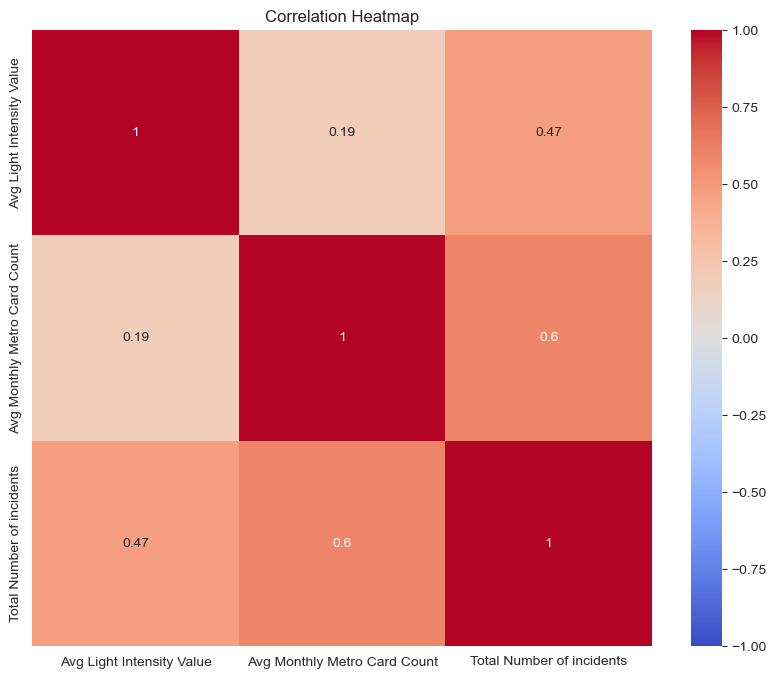

In [17]:
# Graph 1 HEATMAP: To see if there are correlations between variables and if so are they strong/weak or positive/negative?

# Selecting specific columns to use
selected_columns = ['Avg Light Intensity Value', 'Avg Monthly Metro Card Count', 'Total Number of incidents']
selected_data = MERGED[selected_columns]

# Generating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021')])

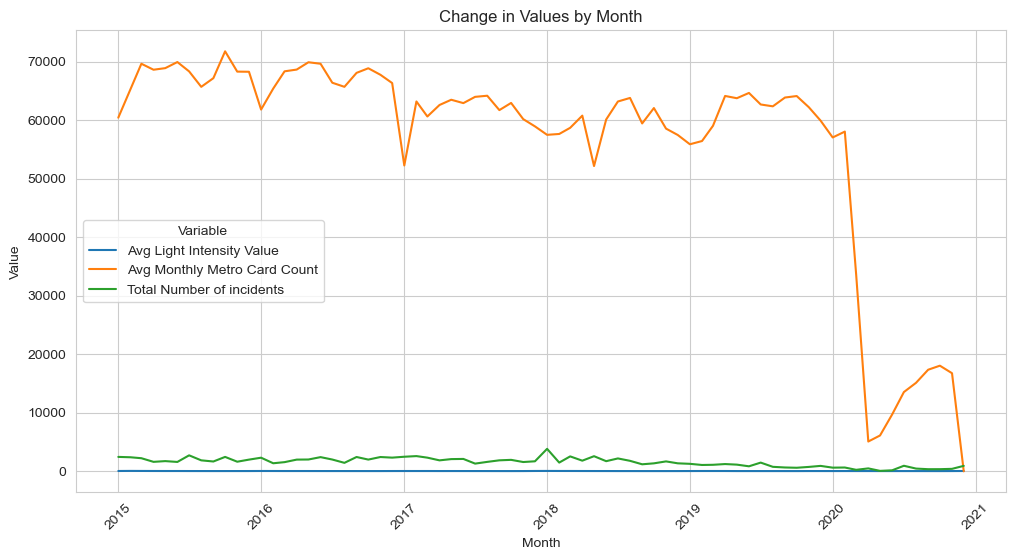

In [18]:
# Graph 2 LINEGRAPH: Visualizing light intensity, avg number of metro cards, and total number of incidents over the entire date range

# Converting Month column to datetime format
MERGED['Month'] = pd.to_datetime(MERGED['Month'])

# Filtering to exclude other variables
variables_to_exclude = ['Number of incidents: Other', 'Number of incidents: Police/Medical/Person on Track', 'Number of incidents: Signals', 'Number of incidents: Stations and Structure', 'Number of incidents: Subway Car', 'Number of incidents: Track']
MERGED_filtered = MERGED.drop(columns=variables_to_exclude)

# Melting* the DataFrame to combine the remaining columns into one
MERGED_melted = MERGED_filtered.melt(id_vars=['Month'], var_name='Variable', value_name='Value')

# Plotting graph
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=MERGED_melted, x='Month', y='Value', hue='Variable', dashes=False)
plt.title('Change in Values by Month')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45)

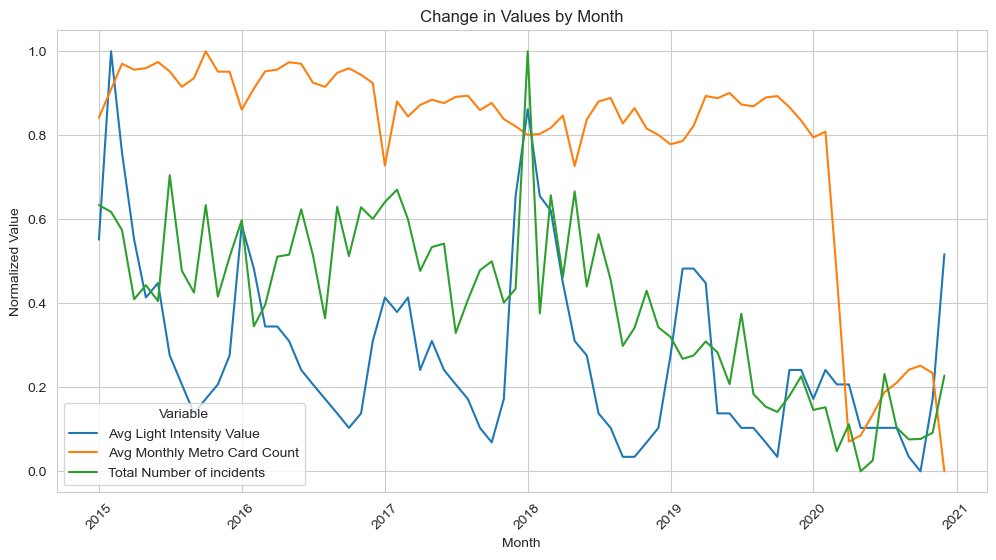

In [20]:
# REDOING GRAPH 2: Normalizing all variables so graph can show better comparison

# Excludeing Month column from normalization
variables_to_normalize = ['Avg Light Intensity Value', 'Avg Monthly Metro Card Count', 'Total Number of incidents']

# Filtering to exclude other variables
variables_to_exclude = ['Number of incidents: Other', 'Number of incidents: Police/Medical/Person on Track', 'Number of incidents: Signals', 'Number of incidents: Stations and Structure', 'Number of incidents: Subway Car', 'Number of incidents: Track']
MERGED_filtered = MERGED.drop(columns=variables_to_exclude)

# Copying dataframe just incase 
MERGED_normalized = MERGED_filtered.copy()

# Initializing MinMaxScaler
scaler = MinMaxScaler()

# Normalizing selected variables
MERGED_normalized[variables_to_normalize] = scaler.fit_transform(MERGED_normalized[variables_to_normalize])

# Melting* fataframe to combine columns into one
MERGED_melted_normalized = MERGED_normalized.melt(id_vars=['Month'], var_name='Variable', value_name='Value')

# Plotting graph
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=MERGED_melted_normalized, x='Month', y='Value', hue='Variable', dashes=False)
plt.title('Change in Values by Month')
plt.xlabel('Month')
plt.ylabel('Normalized Value')
plt.xticks(rotation=45)
plt.show()

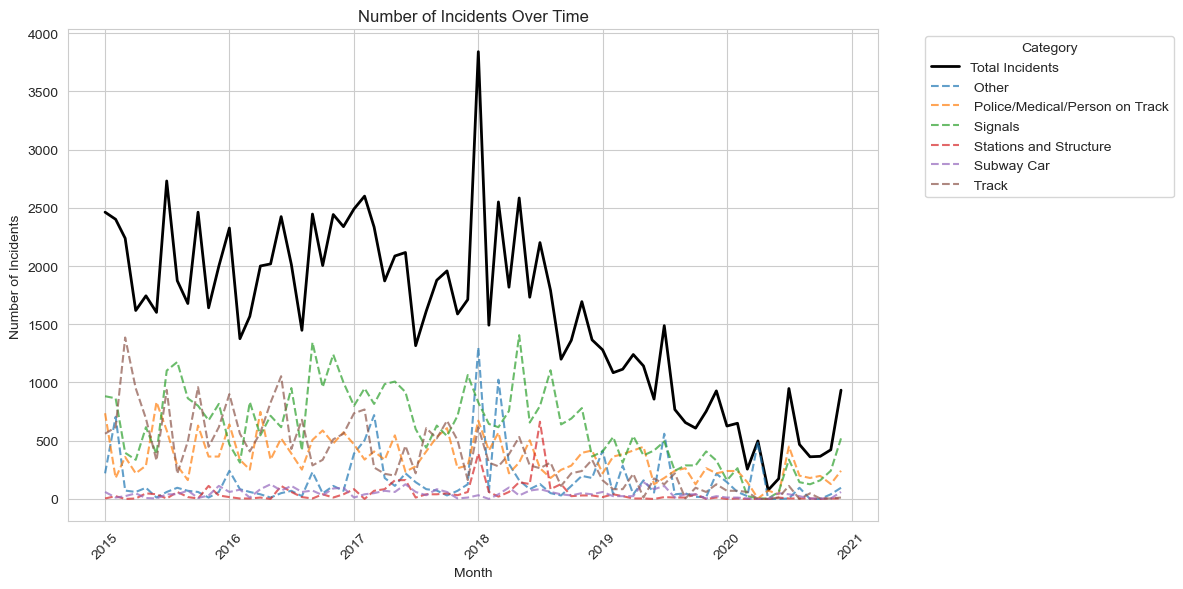

In [25]:
# Graph 3 LINEGRAPH(2): Showing number of incidents broken down by category & playing with cool line styles

# Filtering to include only relevant columns
columns_to_plot = ['Month', 'Total Number of incidents', 'Number of incidents: Other', 'Number of incidents: Police/Medical/Person on Track',
                   'Number of incidents: Signals', 'Number of incidents: Stations and Structure', 'Number of incidents: Subway Car',
                   'Number of incidents: Track']

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=MERGED[columns_to_plot], x='Month', y='Total Number of incidents', linewidth=2, label='Total Incidents', color='black')

# Looping through each category column to plot as dotted lines
for column in columns_to_plot[2:]:
    if column != 'Total Number of incidents':
        sns.lineplot(data=MERGED[columns_to_plot], x='Month', y=column, linestyle='--', alpha=0.7, label=column.split(':')[-1])

plt.title('Number of Incidents Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# SOURCES

melting documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

melting help: https://stackoverflow.com/questions/68961796/how-do-i-melt-a-pandas-dataframe 

For lineplot, seaborn documentation: https://seaborn.pydata.org/generated/seaborn.lineplot.html

loc & iloc: https://stackoverflow.com/questions/31593201/how-are-iloc-and-loc-different
https://www.geeksforgeeks.org/difference-between-loc-and-iloc-in-pandas-dataframe/
